In [1]:
import astropy
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image 
import numpy as np
from astropy.io import fits

In [2]:
pabdatazcut = fits.open('pabdatazcut.fits')
sortedpab = sorted(pabdatazcut[1].data , key = lambda data: data['PAB_FLUX'] , reverse = True )

data_dict= dict()
for obj in sortedpab:
    for key in ['FIELD', 'ID', 'Z_50', 'Z_84','Z_16' , 'PAB_FLUX', 'PAB_FLUX_ERR']:
        data_dict.setdefault(key, list()).append(obj[key])

sortedpabdf = pd.DataFrame(data_dict)
sortedpabdf['Z_ERR']= ((sortedpabdf['Z_84'] - sortedpabdf['Z_50']) + (sortedpabdf['Z_50'] - sortedpabdf['Z_16'])) / (2 * sortedpabdf['Z_50'])
sortedpabdf['OBS_PAB'] = 12820 * (1 + sortedpabdf['Z_50'])
sortedpabdf.loc[sortedpabdf['FIELD'] == "ERS" , 'FIELD'] = "ERSPRIME"
sortedpabdf = sortedpabdf[['FIELD' , 'ID' , 'Z_50' , 'Z_ERR' , 'PAB_FLUX' , 'PAB_FLUX_ERR' , 'OBS_PAB']]


In [14]:
grism2D = fits.open('D:/clear/RELEASE_v2.1.0/spec2D/GN2/GN2_19651.stack.fits')
grism1D = fits.open('D:/clear/RELEASE_v2.1.0/spec1D/GN2/GN2_19651.1D.fits')
grism2D.info()
#display(grism1D[1].header)

Filename: D:/clear/RELEASE_v2.1.0/spec2D/GN2/GN2_19651.stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   ()      
  1  SCI         G102,264.0 ImageHDU        66   (178, 64)   float32   
  2  WHT         G102,264.0 ImageHDU        22   (178, 64)   float32   
  3  CONTAM      G102,264.0 ImageHDU        22   (178, 64)   float32   
  4  MODEL       G102,264.0 ImageHDU        24   (178, 64)   float32   
  5  KERNEL      G102,264.0 ImageHDU        22   (64, 64)   float32   
  6  SCI         G102,301.0 ImageHDU        66   (178, 64)   float32   
  7  WHT         G102,301.0 ImageHDU        22   (178, 64)   float32   
  8  CONTAM      G102,301.0 ImageHDU        22   (178, 64)   float32   
  9  MODEL       G102,301.0 ImageHDU        24   (178, 64)   float32   
 10  KERNEL      G102,301.0 ImageHDU        22   (64, 64)   float32   
 11  SCI         G102,338.0 ImageHDU        66   (178, 64)   float32   
 12  WHT         G102,338.0 Ima

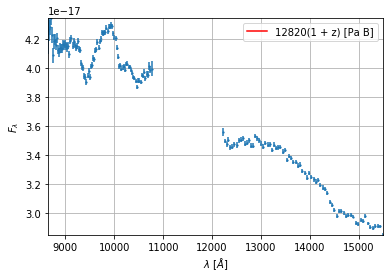

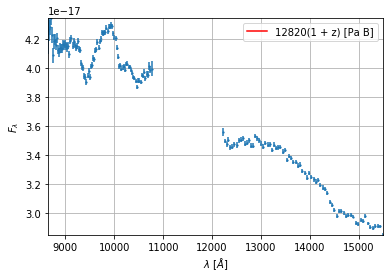

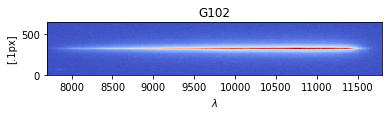

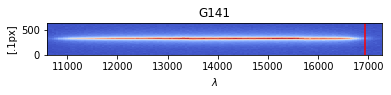

In [19]:

df = pd.DataFrame(grism1D[1].data)
dfb = pd.DataFrame(grism1D[2].data)
df = df.append(dfb)
df = df[df.flux != 0]

plt.figure()
plt.scatter(df['wave'] , df['flux'] / df['flat'] , s = 1.5)
#plt.title(str(sortedpabdf.at[i , 'FIELD']) + ' ' + str(sortedpabdf.at[i , 'ID']) + ' ' + '1D Spectrum')
plt.axvline(pabz, color='r', label='12820(1 + z) [Pa B]')
plt.xlabel("$\lambda$ [$\AA$]")
plt.ylabel("$F_\lambda$")
plt.errorbar(df['wave'], df['flux'] / df['flat'],yerr=df['err'] / df['flat'], linestyle="None")
plt.axis([min(df['wave']) , max(df['wave']) , min(df['flux'] / df['flat']) , max(df['flux'] / df['flat'])])
plt.legend()
plt.grid()
plt.show() 

g102=grism2D[16].data
wave102 = np.arange(10000 * grism2D[16].header['WMIN'] , 10000 * grism2D[16].header['WMAX'] , grism2D[16].header['DLAM'])
g141=grism2D[25].data
wave141 = np.arange(10000 * grism2D[25].header['WMIN'] , 10000 * grism2D[25].header['WMAX'] , grism2D[25].header['DLAM'])
pabz = sortedpabdf.at[0 , 'OBS_PAB']

plt.figure()
plt.imshow(g102, extent = [wave102[0] , wave102[len(wave102) - 1] , 0 , grism2D[6].header['NAXIS2'] * 10], origin = 'lower' ,  cmap='coolwarm')
#plt.colorbar()
plt.xlabel('$\lambda$')
plt.ylabel('[.1px]')
plt.title('G102')

plt.figure()
plt.imshow(g141, extent = [wave141[0] , wave141[len(wave141) - 1] , 0 , grism2D[15].header['NAXIS2'] * 10], origin = 'lower' ,  cmap='coolwarm')
plt.axvline(pabz, color='r', label='12820(1 + z) [Pa B]')
#plt.colorbar()
plt.xlabel('$\lambda$')
plt.ylabel('[.1px]')
plt.title('G141')
plt.show()

# plt.subplot(213)
# plt.imshow(g141, extent = [wave141[0] , wave141[len(wave141) - 1] , 0 , grism2D[15].header['NAXIS2'] * 10], origin = 'lower' ,  cmap='coolwarm')
# plt.axvline(pabz, color='r', label='12820(1 + z) [Pa B]')
# #plt.colorbar()
# plt.xlabel('$\lambda$')
# plt.ylabel('[.1px]')
# plt.title('G141')
# plt.show()


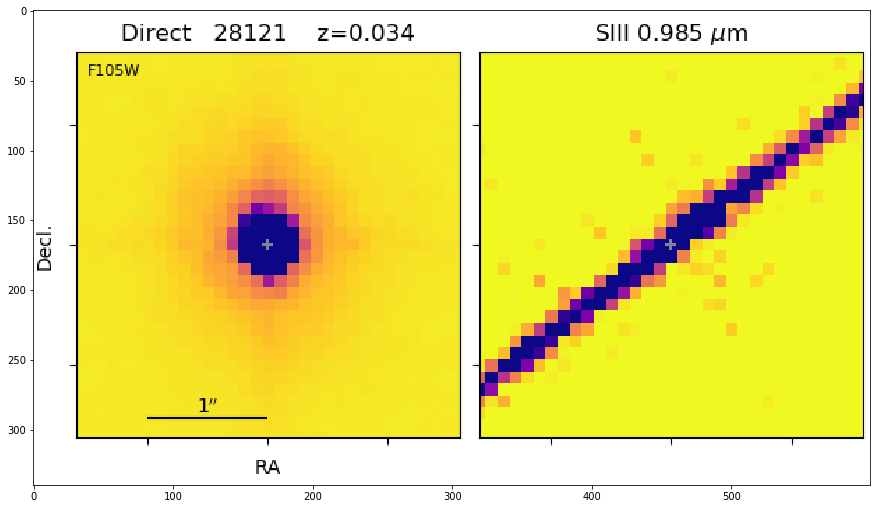

In [57]:
img = mpimg.imread('D:/clear/RELEASE_v2.1.0/fits/all_png/GN4_28121.line.png')
plt.figure(figsize = (15 , 15))
plt.imshow(img) 
plt.show()

In [51]:
img = Image.open('D:/clear/RELEASE_v2.1.0/fits/all_png/GN4_28121.line.png')
img.show()

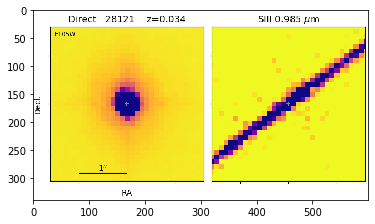

In [54]:
img = plt.imread('D:/clear/RELEASE_v2.1.0/fits/all_png/GN4_28121.line.png')
plt.imshow(img)